```Prepare Your Data```

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [31]:
df = pd.read_csv("/content/EDA.csv")

In [32]:
# Separate features and target
X =df.drop('Daily Rental Price',axis=1)
y = df['Daily Rental Price']

In [33]:
# Categorical and numerical feature lists
categorical_features = ['Car Make', 'Car Model', 'Fuel Type', 'Location', 'Car Condition', 'Demand']
numerical_features = ['Mileage (in km)', 'Engine Size (L)', 'Rental Duration (days)', 'Year of Manufacture']

In [34]:
# Import necessary libraries
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

#pipeline for preprocessing
preprocessor = ColumnTransformer(
    transformers = [
        ('num',StandardScaler(),numerical_features),
        ('cat',OneHotEncoder(drop='first'),categorical_features)
    ]
)

In [35]:
preprocessor


ColumnTransformer(transformers=[('num', StandardScaler(),
                                 ['Mileage (in km)', 'Engine Size (L)',
                                  'Rental Duration (days)',
                                  'Year of Manufacture']),
                                ('cat', OneHotEncoder(drop='first'),
                                 ['Car Make', 'Car Model', 'Fuel Type',
                                  'Location', 'Car Condition', 'Demand'])])

In [36]:

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [37]:
#Defining linear regression model
model = LinearRegression()


In [38]:
from sklearn.pipeline import Pipeline
# Create a pipeline with preprocessing and model
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('model', model)])


In [39]:
print(X_train.columns.duplicated())  # Returns True for duplicate columns
print(X_train.columns[X_train.columns.duplicated()])  # Shows which columns are duplicated


[False False False False False False False False False False False False
 False]
Index([], dtype='object')


In [40]:
X_train = X_train.loc[:, ~X_train.columns.duplicated()]
X_test = X_test.loc[:, ~X_test.columns.duplicated()]


In [41]:
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

In [42]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
#Evaluate the model
print("\nLinear regression")
print("R2 Score:",r2_score(y_test,y_pred))
print("MSE:",mean_squared_error(y_test,y_pred))
print("MAE:",mean_absolute_error(y_test,y_pred))


Linear regression
R2 Score: 0.9373953366252065
MSE: 24.65449865936891
MAE: 4.0502047382522814


```Visualization of resuls```

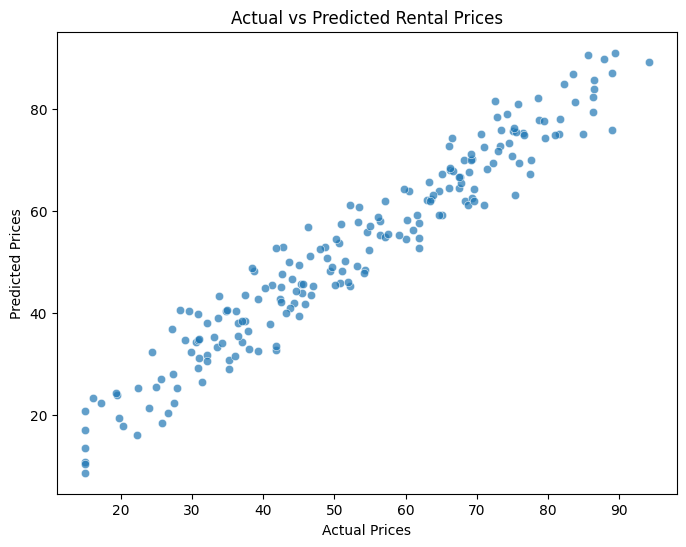

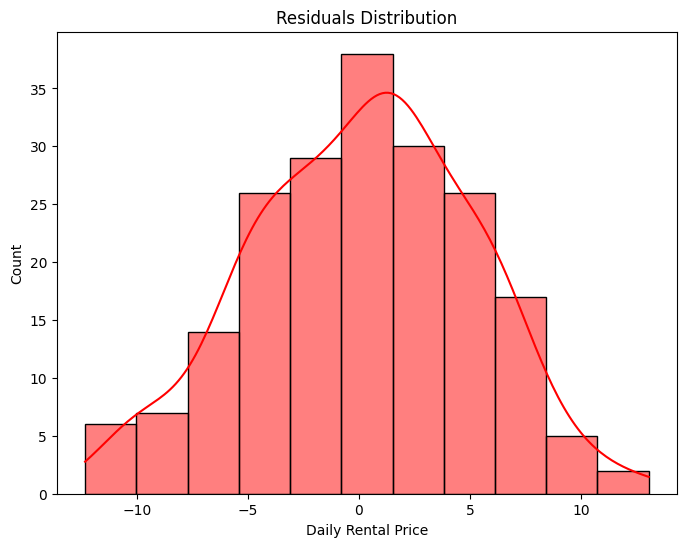

In [43]:
# Plot Actual vs Predicted
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.7)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Rental Prices")
plt.show()

# Residuals
residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True, color='red')
plt.title("Residuals Distribution")
plt.show()

In [44]:

new_data = pd.DataFrame({
    'Car Make': ['Toyota'],
    'Car Model': ['Sedan'],
    'Mileage (in km)': [35000],
    'Engine Size (L)': [1.8],
    'Fuel Type': ['Petrol'],
    'Year of Manufacture': [2015],
    'Rental Duration (days)': [5],
    'Demand': ['Low'],
    'Car Condition': ['New'],
    'Location': ['New York']
})

# Predict using the trained pipeline
new_predictions = pipeline.predict(new_data)

# Output the predictions for the new data
print("\nPredictions for new data:")
print(new_predictions)


Predictions for new data:
[63.40904292]


In [46]:
import pickle
# Save the pipeline
with open('model_pipeline.pkl', 'wb') as file:
    pickle.dump(pipeline, file)
